<a href="https://colab.research.google.com/github/CodeHunterOfficial/Practical-Time-Series-Analysis/blob/main/Shakirova-Liliya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Сначала нам расскажут как применять сезонную ариму, вообще не вдаваясь в то, что происходит внутри, а потом, после сравнения моделей, подробнее рассмотрят ариму.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Seasonal ARIMA

Временной ряд: авиаперевозки (series G)

Дополнительно устанавливаем библиотеку pmdarima 

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.1 MB/s 
     |████████████████████████████████| 9.9 MB 47.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
import pmdarima as pm

Временной ряд: авиаперевозки (series G)
*продублируем нужные нам ячейки из прошлой лекции*

In [ ]:
zzz = pd.read_csv('/content/drive/MyDrive/19.11/series_g.csv', sep = ";")

In [ ]:
zzz.head()

date  series_g
0  JAN 1949       112
1  FEB 1949       118
2  MAR 1949       132
3  APR 1949       129
4  MAY 1949       121

In [ ]:
# номер столбца с данными
column_num = 1

Ответ на 5 вопросов тот же самый:
1. У временного ряда линейный тренд
2. У временного ряда мультипликативная сезонность
3. Ряд не меняет свой характер
4. У ряда нет выбросов
5. У ряда нет пропусков


---



Сейчас для нас важно, что сезонность **мультипликативная**. В авто-ариму не встроено никаких инструментов перевода ряда с мультипликативной сезонностью к ряду с аддитивной сезонностью, по'тому самим придётся логарифмировать. (Если сезонность сразу аддитивная, никакого логарифмирования не нужно).

In [ ]:
zzz_2 = np.log10(zzz[zzz.columns[column_num]])

In [ ]:
# Проверяем, что всё нормально
zzz_2.head(5)

0    2.049218
1    2.071882
2    2.120574
3    2.110590
4    2.082785
Name: series_g, dtype: float64

Text(0.5, 1.0, 'Логарифм объёма пассажироперевозок')

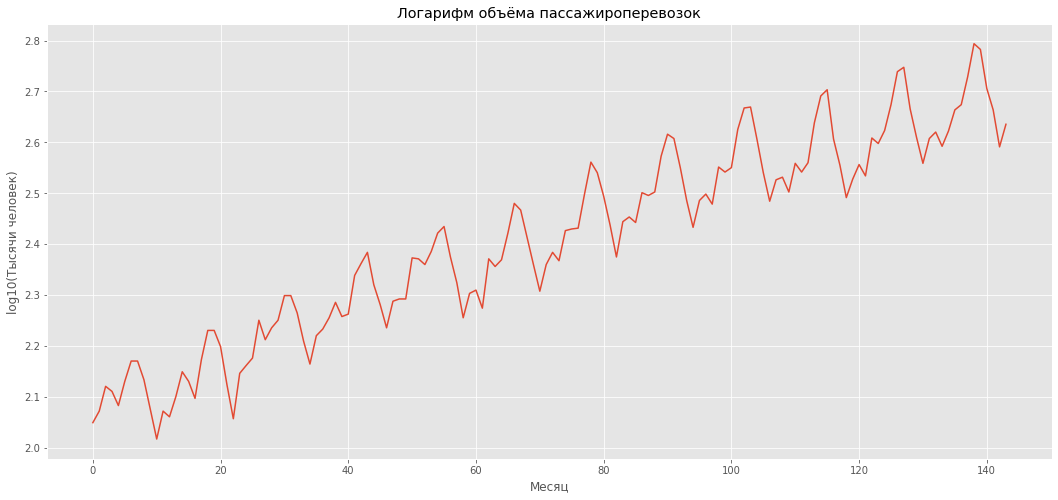

In [ ]:
# строим график
plt.figure(figsize=(18,8))

zzz_2.plot()

plt.xlabel(u'Месяц')
plt.ylabel(u'log10(Тысячи человек)')
plt.title(u'Логарифм объёма пассажироперевозок')


Этот ряд теперь можно прогнозировать с помощью авто-аримы.

In [ ]:
# Значение периода сезонных отклонений = 12
seas_period_ = 12

# Что может быть?
# если данные поквартальные
# freq_ = 4 
# если данные по дням
# freq_ = 7
# если данные по часам
# freq_ = 24

При этом, в авто-ариме очень тяжело, когда у ряда несколько сезонностей.
Теоретически, мы можем писать несколько сезонностей, на практике - работает плохо.

Для процедуры авто-арима нам необходимо только подготовить ряд zzz_2, всё остальное заполняется автоматически.
Вопрос: Можно ли записывать сюда дополнительные предикторы,т.н.внешние регрессоры?
Ответ: да, если вы пользуетесь авто-аримой в R; нет, если вы пользуетесь авто-аримой в Python. Лектор верит, что рано или поздно это исправят.

In [ ]:
model_2 = pm.auto_arima(zzz_2, exogenous=None,
                        start_p=2, d=None, start_q=2,
                        max_p=2, max_d=2, max_q=2,
                        start_P=1, D=None, start_Q=1,
                        max_P=2, max_D=2, max_Q=2, max_order=8,
                        m = seas_period_,
                        seasonal=True,
                        stationary=False,
                        information_criterion='aic',
                        alpha=0.05,
                        test='kpss', seasonal_test='ch',
                        stepwise=True, n_jobs=1, start_params=None,
                        trend='c', transparams=True,
                        solver='lbfgs', maxtier=50,
                        disp=0, callback=None, offset_test_args=None,
                        seasonal_test_args=None, suppress_warnings=False,
                        error_action='warn', trace=False, random=False,
                        random_state=None, n_fits=10, return_valid_fits=False,
                        out_of_sample_size=0, scoring='mse', scoring_args=None)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/optimizer.py:23: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: maxtier, exogenous. After release 0.14, this will raise.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/statsmodels/base/optimizer.py:23: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: maxtier, exogenous. After release 0.14, this will raise.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/statsmodels/base/optimizer.py:23: FutureWarning: Keyword arguments have been passed to the optimizer that have 

In [ ]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  144
Model:             SARIMAX(2, 1, 2)x(1, 0, [1], 12)   Log Likelihood                 374.536
Date:                              Sat, 19 Nov 2022   AIC                           -733.072
Time:                                      00:26:52   BIC                           -709.369
Sample:                                           0   HQIC                          -723.440
                                              - 144                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.486e-05   8.58e-05      0.406      0.685      -0.000       0.000
ar.L1          0.2043      1.348      0.152      0.879      -2.437       2.846
ar.L2          0.1925      0.504      0.382      0.703      -0.796       1.181
ma.L1         -0.5586      1.374     -0.407      0.684      -3.251       2.134
ma.L2         -0.1672      0.943     -0.177      0.859      -2.016       1.681
ar.S.L12       0.9832      0.012     79.250      0.000       0.959       1.007
ma.S.L12      -0.5330      0.126     -4.240      0.000      -0.779      -0.287
sigma2         0.0003   3.17e-05      8.093      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 2.64
Prob(Q):                              0.86   Prob(JB):                         0.27
Heteroskedasticity (H):               0.62   Skew:                             0.04
Prob(H) (two-sided):                  0.10   Kurtosis:                         3.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Подбираются внешние параметры авто-арима. При этом подбираются годно, но не идеально. 

> Классическая модель для этого ряда SARIMAX (0,1,1)x(0,1,1,12)

А вот в питоне нет. Но мы готовы к тому, что модель будет отличаться от идеальной, но будет годной для использования.

Дальше, работает с данными, метод fit вычисляет прогнозы и подгонки, задаём горизонт прогноза

In [ ]:
model_2.fit(zzz_2)

ARIMA(order=(2, 1, 2), scoring_args={}, seasonal_order=(1, 0, 1, 12), trend='c',
      with_intercept=False)

In [ ]:
# Задаём горизонт прогнозирования

horizon_ = 12

Применяем метод predict, строим прогноз на 12 наблюдений вперёд.

In [ ]:
# Значения прогноза для логарифмов

forecast_2 = model_2.predict(n_periods=horizon_)
forecast_2

144    2.652861
145    2.630454
146    2.679862
147    2.693138
148    2.707515
149    2.764484
150    2.823100
151    2.821217
152    2.746402
153    2.698479
154    2.637363
155    2.681118
dtype: float64

Прогноз для исходного ряда:

In [ ]:
10**forecast_2

144    449.635530
145    427.025469
146    478.477725
147    493.330761
148    509.935545
149    581.411439
150    665.426345
151    662.547913
152    557.701875
153    499.435087
154    433.873224
155    479.864224
dtype: float64

In [ ]:
# Номера месяц, для которых делается прогноз
# чтобы прогноз на графике отображался на месте

valid = range(145, 157, 1)

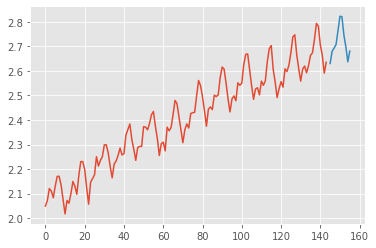

In [ ]:
# Проверим качество прогноза для логарифмов
# Строим графики

forecast_3 = pd.DataFrame(forecast_2, index = valid, columns=["Prediction"])

# график ряда логарифмов
plt.plot(zzz_2, label='Train')
# график прогноза для логарифмов
plt.plot(forecast_3, label='Prediction')
plt.show()

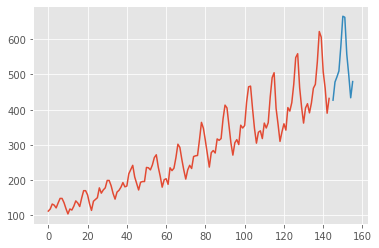

In [ ]:
# По прогнозу для логарифмов вычисляем прогноз для исходного ряда

# Проверяем качество прогноза для исходного ряда
# Строим графики

# график исходного ряда 
plt.plot(10**zzz_2, label='Train')
# график прогноза 
plt.plot(10**forecast_3, label='Prediction')
plt.show()


Вот такой прогноз с авто-аримой.

У нас есть следующие методы получения прогноза:


*   Методами машинного обучения (случайный лес, XGBoost...)
*   Экспоненциальное сглаживание
*   Auto-ARIMA

Каким прогнозом будем полльзоваться? 
Посмотрим, как можно их сравнивать.





 *повторяем старый ноутбук*

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

In [ ]:
zzz_1 = zzz[zzz.columns[column_num]]

In [ ]:
zzz_1

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: series_g, Length: 144, dtype: int64

Экспоненциальное сглаживание

In [ ]:
# Сколько месяцев в историчеких данных?
len(zzz_1)

144

Что происходит? Как мы собираемся сравнивать прогнозы?

Допустим, у нас есть какой-то ряд
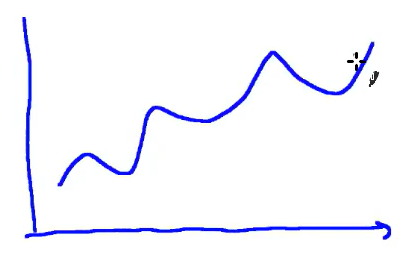


И есть какой-то метод прогнозирования (любой)
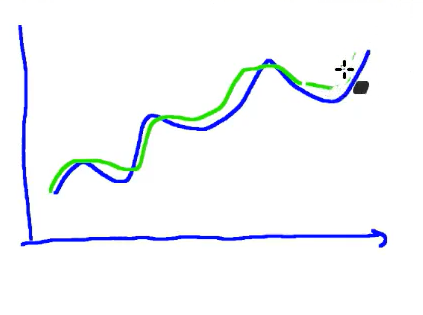

Но мы не будем сразу прогнозировать. 

Возьмём какое-то количество наблюдений и отрежем его, т.е. не удалим, а возьмём эту часть наблюдений и отложим - это будет тестовое множество. А все оставшиеся - обучающее множество.
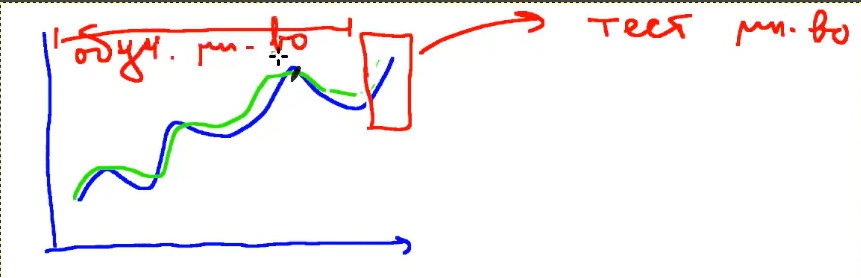

**Сколько откладываем?**

Откладываем столько же, каков горизонт прогноза (*вообще можно откладывать любое количество, но, по мнению лектора, это самый разумный подход*)

У нас горизонт = 12, значит откладываем 12.

Теперь, берём свою модель и с её помощью строим прогноз тех наблюдений, которые составили тестовое множество, делая вид, что мы не знаем эти данные.

Теперь есть тестовое множество, предсказания для тестового множества и мы можем посмотреть, насколько прогноз похож на истинные значения.


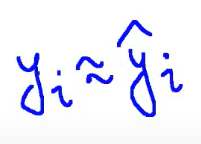

В нашем случае 12 y и 12 ŷ

По ним считаем среднюю абсолютную процентную ошибку MAPE

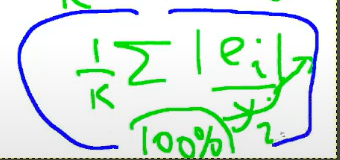

**Какой прогноз будет лучшим?**

Тот, у кого MAPE меньше.

Итак, рекомендуемая схема:


*   Отложить тестовое множество
*   Построить прогноз на тестовое множество
*   Сосчитать на этом тестовом множестве MAPE
*   Сделать это столько раз, сколько у вас методов прогнозирования
*   Из всех MAPE выбрать наименьший. 
*   Метод прогнозирования, соответствующий выбранному MAPE, использовать для прогнозирования

Часто, к списку методов прогнозирования добавляют +1 метод, который состоит в том, что мы прогнозируем среднее арифметическое по всем использованным методам.

Итак, обучающее множество - это все наблюдения без последних 12 (наш горизонт)

**Почему число наблюдений в тестовом множестве равно горизонту?**

Дело в том, что чем дальше мы прогнозируем, тем хуже наш прогноз. Прогнозирование на один день - ошибка маленькая, на 12 - ошибка побольше, на 24 наблюдения вперёд - ошибка гигантская. Некоторые методы лучше прогнозируют надолго вперёд, а некоторые - на короткие интервалы. Чтобы мы выбирали оптимальный метод для данной величины горизонта прогноза, мы и берём в тестовое множество столько наблюдений, чему равен горизонт. Иначе мы подбираем метод для одной задачи, а используем его для другой.



In [ ]:
# Сколько месяцев в обучающей части данных

train_length = len(zzz_1) - horizon_

train_length

132

In [ ]:
# На этой части временного ряда обучаем модель

zzz_train = zzz_1.iloc[0:train_length]

In [ ]:
# обучающее множество
zzz_train

0      112
1      118
2      132
3      129
4      121
      ... 
127    559
128    463
129    407
130    362
131    405
Name: series_g, Length: 132, dtype: int64

In [ ]:
# На этой части временного ряда проверяем качество модели

zzz_test = zzz_1.iloc[train_length:len(zzz_1)]

In [ ]:
# тестовое множество - последние 12 наблюдений
zzz_test

132    417
133    391
134    419
135    461
136    472
137    535
138    622
139    606
140    508
141    461
142    390
143    432
Name: series_g, dtype: int64

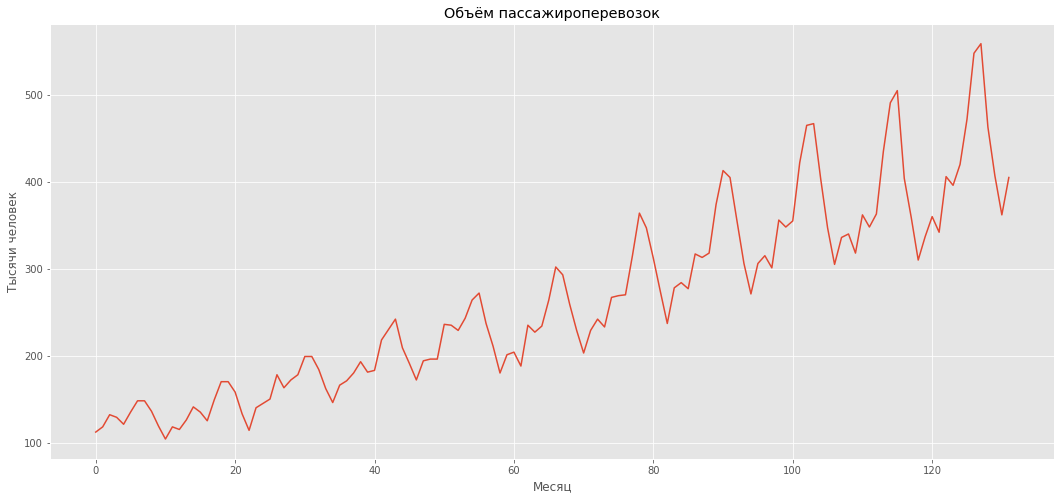

In [ ]:
# строим график
plt.figure(figsize=(18,8))

zzz_train.plot()

plt.xlabel('Месяц')
plt.ylabel('Тысячи человек')
plt.title('Объём пассажироперевозок')

plt.show()

График тестового множества заканчивается уже на 132, а не на 144.

В график добавляем даты


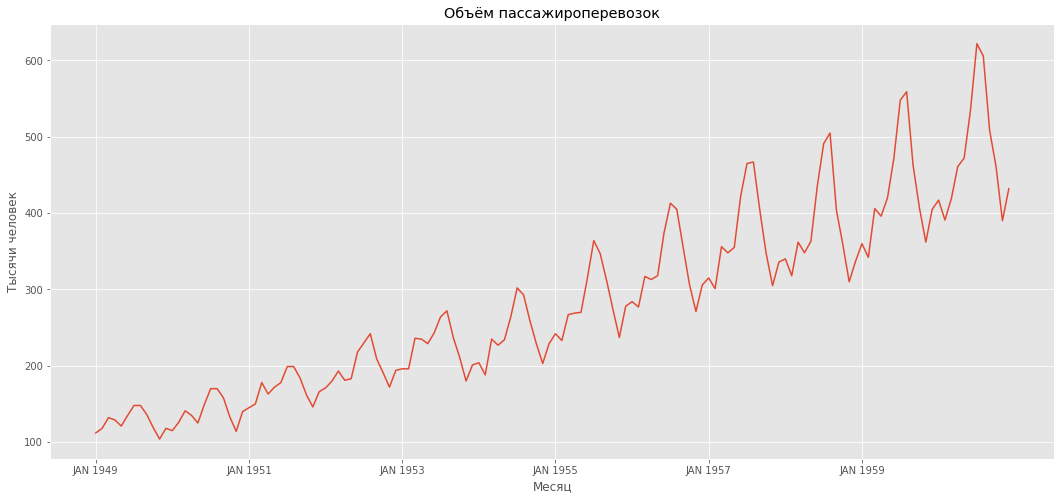

In [ ]:
# В каком столбце брать даты?
zzz_3 = zzz[zzz.columns[0]]

# В каких позяциях на оси размещать даты?
y_pos = np.arange(0, 144, 24)

plt.figure(figsize=(18,8))

zzz_1.plot()
plt.xlabel('Месяц')
plt.ylabel('Тысячи человек')
plt.title('Объём пассажироперевозок')

# Добавляем даты на график
plt.xticks(y_pos, zzz_3[y_pos])

plt.show()


### Приступаем к прогнозированию

In [ ]:
# Ещё раз повторим для наглядности

# На сколько месяцев желаем прогнозировать?
horizon_ = 12

# Какой тип сезонности?
season_type = 'multiplicative'

# Какой период сезонных отклонений?
seas_period_ = 12


In [ ]:
# Всегда trend='additive' по рекомендации Hyndman'a
# Всегда damped=True

fit1 = ExponentialSmoothing(zzz_train, seasonal_periods=seas_period_,
                            trend='additive', seasonal=season_type, damped_trend=True).fit()

In [ ]:
# Работаем не со всем временным рядом, а только с обучающим множеством
len(zzz_train)

132

In [ ]:
fitted_ = fit1.predict(0, len(zzz_train) + horizon_ -1)

In [ ]:
# Подгонка и прогноз разом
fitted_

0      111.910626
1      119.880028
2      133.285120
3      127.673707
4      119.665331
          ...    
139    638.173860
140    521.617531
141    455.334526
142    398.915385
143    427.883263
Length: 144, dtype: float64

In [ ]:
len(fitted_)

144

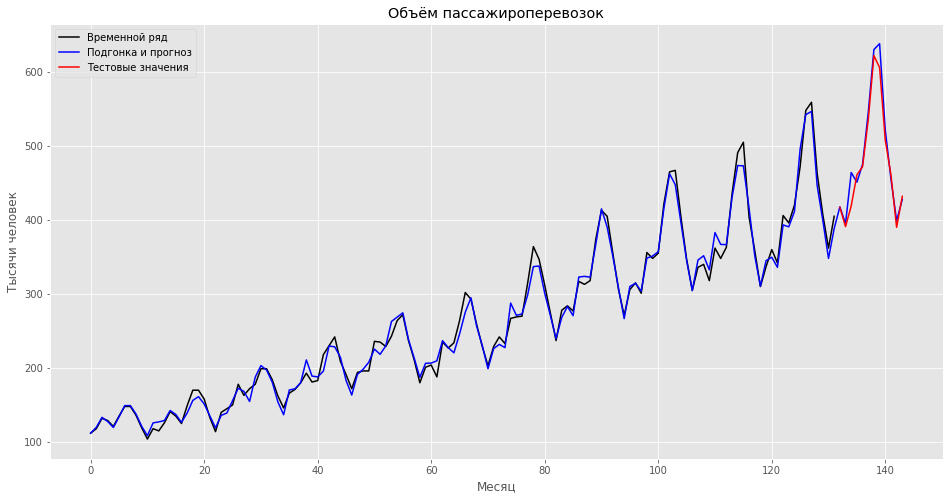

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(zzz_train, label='Временной ряд', c = 'black')
plt.plot(fitted_, label='Подгонка и прогноз', c = 'blue')
plt.plot(zzz_test, label='Тестовые значения', c = 'red')

plt.legend(loc='best')

plt.xlabel('Месяц')
plt.ylabel('Тысячи человек')
plt.title('Объём пассажироперевозок')

plt.show()

In [ ]:
forecast_ = fitted_.iloc[len(zzz_train):len(fitted_)]

In [ ]:
# Mean Absolute Percentage Error
# Используется неидеальная формула
# Если значения временного ряда могут равняться нулю, формулу надо будет менять

MAPE = np.mean(np.abs((forecast_.to_numpy() - zzz_test.to_numpy())/zzz_test.to_numpy()))*100

forecast_.to_numpy() - zzz_test.to_numpy() - ошибка

делить на истинное значение в тестовом множестве zzz_test.to_numpy

потом считается среднее арифметическое этих дробей np.mean

умножается на 100


In [ ]:
MAPE

2.539157117242276

По этой же схеме повторяем для следующей модели:

Seasonal ARIMA

In [ ]:
# Логарифмируем, потому что арима сама не логарифмирует
zzz_2 = np.log10(zzz[zzz.columns[column_num]])

In [ ]:
zzz_2.head(5)

0    2.049218
1    2.071882
2    2.120574
3    2.110590
4    2.082785
Name: series_g, dtype: float64

Смотрим, что логарифмирование привело к аддитивной сезонности

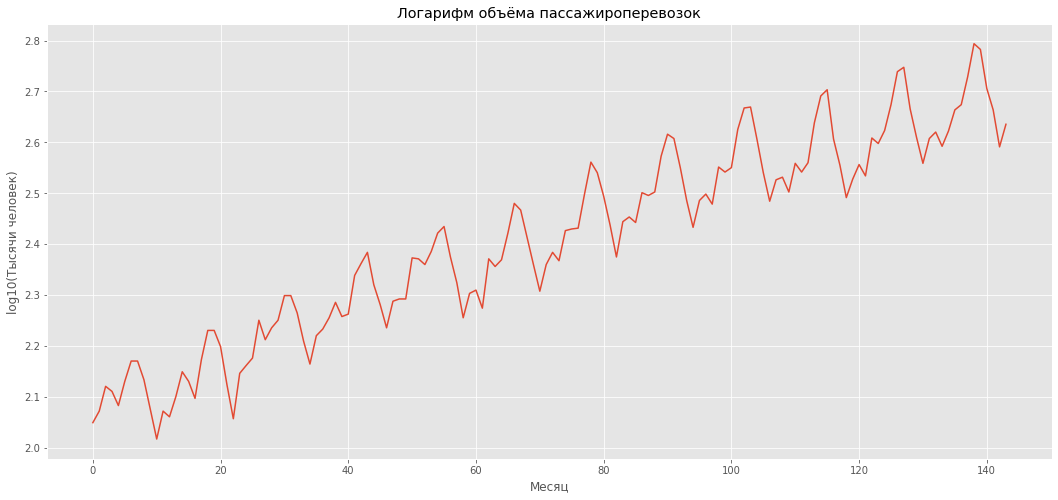

In [ ]:
# строим график
plt.figure(figsize=(18,8))

zzz_2.plot()

plt.xlabel(u'Месяц')
plt.ylabel(u'log10(Тысячи человек)')
plt.title(u'Логарифм объёма пассажироперевозок')

plt.show()

In [ ]:
# Выделяем обучающее множество
zzz_train_2 = zzz_2.iloc[0:train_length]

In [ ]:
zzz_train_2 

0      2.049218
1      2.071882
2      2.120574
3      2.110590
4      2.082785
         ...   
127    2.747412
128    2.665581
129    2.609594
130    2.558709
131    2.607455
Name: series_g, Length: 132, dtype: float64

In [ ]:
# Выделяем тестовое множество
zzz_test_2 = zzz_2.iloc[train_length:len(zzz_2)]

In [ ]:
zzz_test_2 

132    2.620136
133    2.592177
134    2.622214
135    2.663701
136    2.673942
137    2.728354
138    2.793790
139    2.782473
140    2.705864
141    2.663701
142    2.591065
143    2.635484
Name: series_g, dtype: float64

In [ ]:
model_2 = pm.auto_arima(zzz_train_2, exogenous=None,
                        start_p=2, d=None, start_q=2,
                        max_p=2, max_d=2, max_q=2,
                        start_P=1, D=None, start_Q=1,
                        max_P=2, max_D=2, max_Q=2, max_order=8,
                        m = seas_period_,
                        seasonal=True,
                        stationary=False,
                        information_criterion='aic',
                        alpha=0.05,
                        test='kpss', seasonal_test='ch',
                        stepwise=True, n_jobs=1, start_params=None,
                        trend='c', transparams=True,
                        solver='lbfgs', maxtier=50,
                        disp=0, callback=None, offset_test_args=None,
                        seasonal_test_args=None, suppress_warnings=False,
                        error_action='warn', trace=False, random=False,
                        random_state=None, n_fits=10, return_valid_fits=False,
                        out_of_sample_size=0, scoring='mse', scoring_args=None)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/optimizer.py:23: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: maxtier, exogenous. After release 0.14, this will raise.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/statsmodels/base/optimizer.py:23: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: maxtier, exogenous. After release 0.14, this will raise.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/statsmodels/base/optimizer.py:23: FutureWarning: Keyword arguments have been passed to the optimizer that have 

In [ ]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 341.052
Date:                            Sat, 19 Nov 2022   AIC                           -672.105
Time:                                    01:44:06   BIC                           -657.729
Sample:                                         0   HQIC                          -666.263
                                            - 132                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.784e-05    8.5e-05      0.210      0.834      -0.000       0.000
ma.L1         -0.3311      0.075     -4.390      0.000      -0.479      -0.183
ar.S.L12       0.9956      0.004    256.281      0.000       0.988       1.003
ma.S.L12      -0.6009      0.090     -6.659      0.000      -0.778      -0.424
sigma2         0.0002   2.65e-05      8.891      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 1.31
Prob(Q):                              0.80   Prob(JB):                         0.52
Heteroskedasticity (H):               0.49   Skew:                             0.01
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Модель немного изменилась

In [ ]:
# Подбираем параметры модели
model_2.fit(zzz_train_2)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12), trend='c',
      with_intercept=False)

In [ ]:
# предсказываем по обучающему на тестовое
# Значение прогнозов для логарифмов
forecast_2 = model_2.predict(n_periods=horizon_)
forecast_2

132    2.622252
133    2.601564
134    2.668655
135    2.657421
136    2.673957
137    2.736485
138    2.791071
139    2.795976
140    2.720421
141    2.664308
142    2.609076
143    2.655222
dtype: float64

In [ ]:
# Значение прогнозов для исходного ряда
10**forecast_2

132    419.037026
133    399.543732
134    466.289023
135    454.381756
136    472.016564
137    545.111571
138    618.117792
139    625.138169
140    525.315903
141    461.644961
142    406.514437
143    452.087320
dtype: float64

In [ ]:
# Номера месяцев, для которых делается прогноз

valid = range(132, 144, 1)


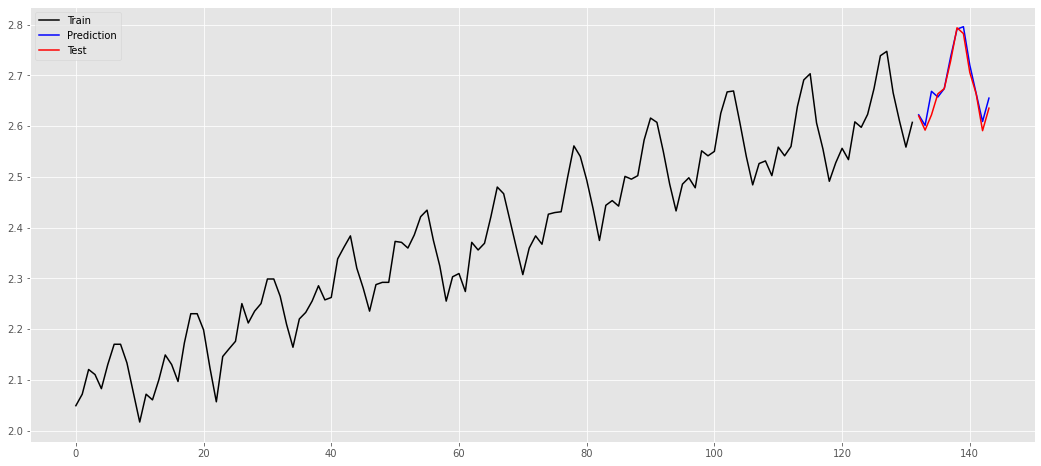

In [ ]:
# Проверим качество прогноза для логарифмов
# Строим графики

forecast_3 = pd.DataFrame(forecast_2, index = valid, columns=["Prediction"])

plt.figure(figsize=(18,8))

# график ряда логарифмов
plt.plot(zzz_train_2, label='Train', c='black')
# график прогноза для логарифмов
plt.plot(forecast_3, label='Prediction', c='blue')

plt.plot(zzz_test_2, label='Test', c='red')

plt.legend(loc='best')

plt.show()

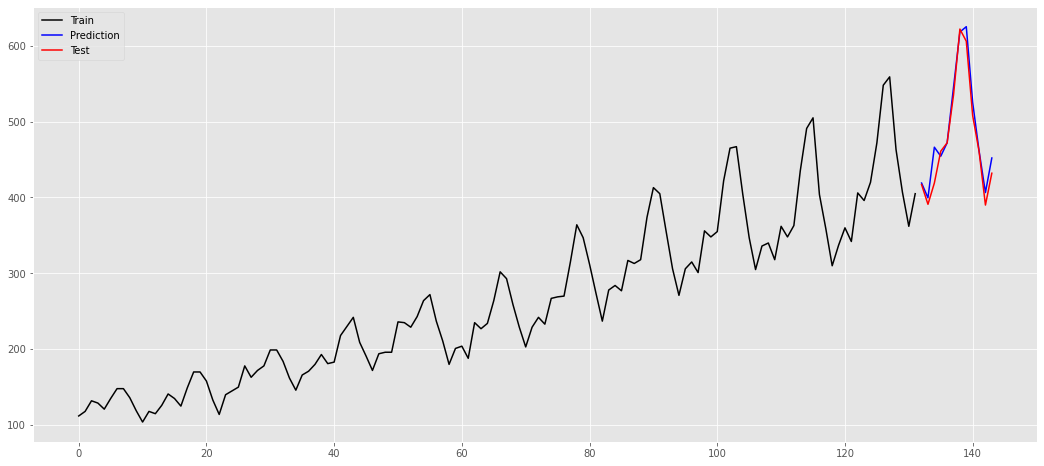

In [ ]:
# Проверим качество прогноза для исходного ряда
# Строим графики

forecast_3 = pd.DataFrame(forecast_2, index = valid, columns=["Prediction"])

plt.figure(figsize=(18,8))

# график ряда логарифмов
plt.plot(10**zzz_train_2, label='Train', c='black')
# график прогноза для логарифмов
plt.plot(10**forecast_3, label='Prediction', c='blue')

plt.plot(10**zzz_test_2, label='Test', c='red')

plt.legend(loc='best')
plt.show()

Точно измерим качество

In [ ]:
forecast_4 = 10**forecast_3.to_numpy().flatten()
zzz_test_3 = 10**zzz_test_2.to_numpy()

In [ ]:
# Mean Absolute Percentage Error
# Используется неидеальная формула
# Если значения временного ряда могут равняться нулю, формулу надо будет менять

MAPE_ARIMA = np.mean(np.abs((forecast_4 - zzz_test_3)/zzz_test_3))*100

In [ ]:
MAPE_ARIMA

2.792002487933766

In [ ]:
print(MAPE)
print(MAPE_ARIMA)

2.539157117242276
2.792002487933766


Из двух методов прогнозирования выбираем экспоненциальное сглаживание.
Также можно посмотреть модель с подсчётом среднего арифметического:

In [ ]:
forecast_hybrid = (forecast_.to_numpy() + forecast_4) / 2

In [ ]:
MAPE_hybrid = np.mean(np.abs((forecast_hybrid - zzz_test_3)/zzz_test_3))*100

In [ ]:
MAPE_hybrid

2.5224962816166467

Итак, мы выяснили, как выбирать из нескольких моделей.

**ARIMA -  autoregressive integrated moving average **

Эта модель, состоящая из атворегрессии и скользящего среднего, внутри есть буква I - Проинтегрированная. О чём это? Это наша борьба за стационарность ряда.


**Что такое стационарность?**

Это когда зависимость между переменными, например, этим наблюдением (красная точка) и наблюдением, сделанным пять интервалов времени назад 
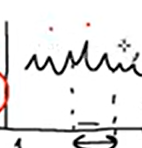

у них параметры не меняются: мат.ожидание, дисперсия, корреляции между наблюдениями, сделанные несколько интервалов времени назад.


Модель ARMA придумана для стационарных рядов, а I (проинтегрированная) - это инструмент, чтобы сделать ряд стационарным.

При этом, есть элемент подлога. С точки зрения математика, стационарность необходима, на практике, проверять эту стационарность довольно сложно. Поэтому, то, что требует теория называется "строгой" стационарностью, практики ослабляют требования к стационарности, поэтому на практике проверяют не то, что надо - требование строгой стационарность заменяют слабой стационарностью.

**В чём состоит слабая стационарность?**
В том, что мы предполагаем, что среднее значение ряда постоянно, и дисперсия ряда постоянна, т.е. берём какой-то интервал времени и начинаем двигаться по ряду "окошками": берём, например, первые 10 наблюдений, начиная с 1, 10 наблюдений, начиная со 2, 10 наблюдений, начиная с 3 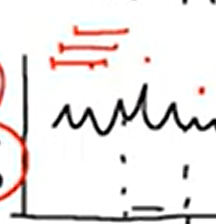

и мы требуем, чтобы мат.ожидание и дисперсия не менялись. Т.е. слабая стационарность состоит в требовании в том, что скользящее средняя, скользящая дисперсия вот таким образом на меняющемся интервале времени, оставались постоянными, а если менялись, то статистически не значимо.

Как следствие, мы имеем, что такой ряд не стационарен (средние по каждым наблюдениям - разные точки, у ряда - растущий тренд)

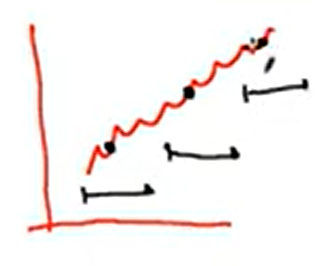

В таком ряду дисперсия не стационарна:

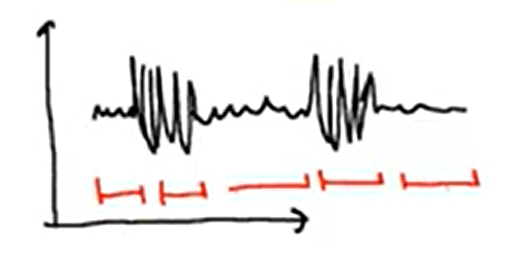

Конкретно для случая как на картинке есть название - кластеризация волатильности, т.е. резкие изменения дисперсии сконцентрированы на отдельных интервалах.

В случаях обоих графиков выше ARIMA не применима.

В первом случае, мы можем сделать ряд стационарным.

Чтобы сделать ряд стационарным есть два инструмента:


1.   Удаление тренда
2.   Взятие разности

Классический подход заключается в том, что нужно взять разности.

Вот у нас есть исходный ряд:

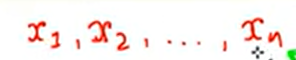



Мы создаём новый ряд, который состоит из разности сосдених элементов, т.н. ряд из разностей:

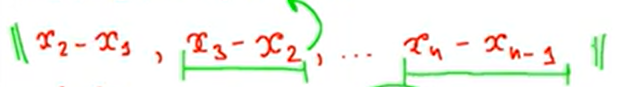

Причём тут интегрирование?

Дело в том, что в каком-то смысле эти разности то же самое, что дифференцирование. Вспомним определение дифференцирования: возьмём значение функции, возбмём значение функции и поделим на разность аргументов, а потом эту разность аргументов устремим к нулю и получим производную

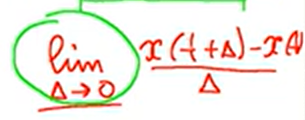

А здесь разность мы не можем устремить к нулю: если у нас разница между наблюдениями каждый месяц, то как мы этот месяц (т.е. разницу между соседними наблюдениями во времени) устремим к 0.

Есть такой раздел математики - исчесление конечных разностей, где изучаются свойства таких разностей, и между делом выясняется, что эти разности очень похожи по своему поведению на производную.

Когда мы от разности переходим к исходному ряду, мы берём x1 и прибавляем первую разность - получаем х2, берём х2 и прибавляем вторую разность - получаем х3. Такая обратная процедура в исчеслении конечных разностей называется интегрированием.

**Какой от этого толк?**

Предположим, у нас есть стационарный ряд

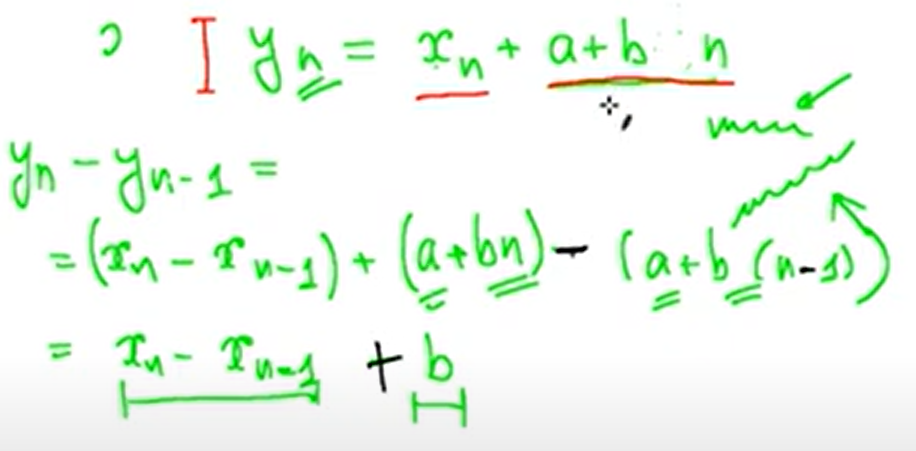

К значениям стационарного ряда добавим тренд - линейную ф-цию. Если к такому ряду применить процедуру взятия разности, получается что стационарный минус стационарный + константа, т.е. если есть линейный тренд, то взятие разности удаляет этот тренд.

Если тренд описан параболой, то если взять разности параболический тренд превратится в линейный. А если взять из разностей этого нового ряда вторые разности, она удалит и линейный тренд.

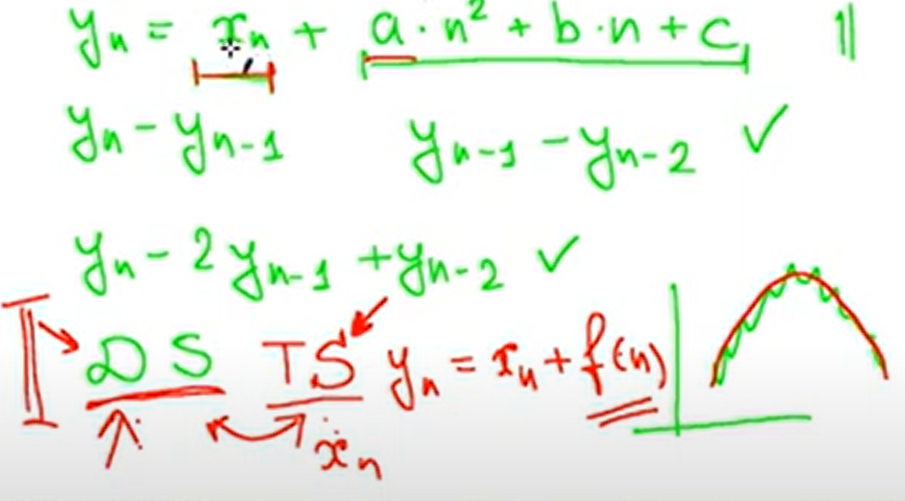

DS = Difference Stationary = ряд, который становится стационарным после взятия разностей.

TS = Trend Stationary = ряд, который становится стационарным после удаления тренда.

Лектор будет рассказывать про Difference Stationary подход - берём столько разностей, сколько надо, чтобы ряд стал стационарным.

Значит, недостаток - Необходимо определить число раз, когда мы возьмём разность.
Ещё Бокса — Дженкинс, изобретатели метода, говорили, что редко нужно брать больше двух разностей. 


В нашей модели, число взятых разностей - центральное число

модель для несезонной части и модель для сезонных отклонений

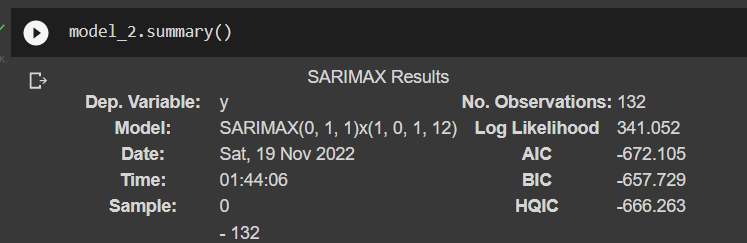



Оказывается, что для исходного ряда модель требует одну разность, а для сезонной - 0 разностей.

**Дальше - AR, авторегрессия**- регрессия по самому себе.

У нас есть временной ряд:

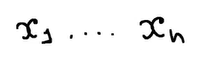

Строим регрессионную модель y = ax + b, причём в качестве x берётся предыдущее значение ряда: если k соответствует сегодняшнему числу, k-1 - вчерашние наблюдения, получается, что сегодняшнюю погоду прогнозируем по вчерашней погоде, сегодняшние продажи - по вчерашним продажам, а завтрашние - по сегодняшним. + есть случайная погрешность (не можем прогнозировать, будем предполагать равной нулю)

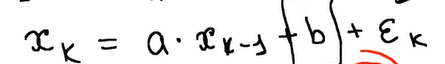


Это авторегрессионная модель первого порядка - берём наблюдения, отстоящие от сегодня на одининтервал времени.

Например, здесь - авторегрессионная модель третьего порядка, прогнозируем по трём предыдущим наблюдениям - прогнозировать завтра по сегодня, вчера и позавчера.

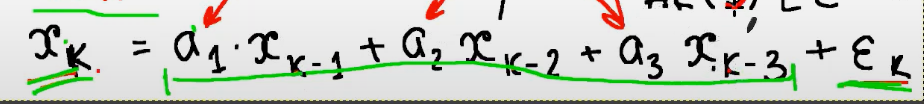

За счёт переобозначения, в литературе свободный член может пропадать

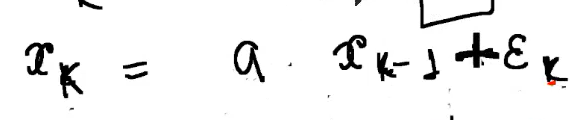

Ещё одно ограничение: |а| ∈ [0,1]


Автор этого подхода - англичанин Юл

**Теперь - MA - Moving Average - скользящее среднее.**

Будем моделировать очередное значение нашего временного ряда, опираясь на эпсилон.


Берём эпсилон на предыдущем этапе, на позапрошлом и т.д. - количество интервалов, на которое эпсилон уходит в прошлое - это и есть q

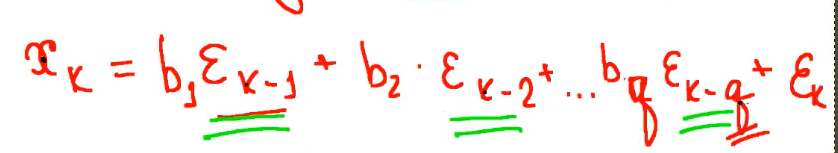


Число авторегрессионных слагаемых традиционно обозначается p, число слагаемых типа скользящего среднего традиционно обознацается q

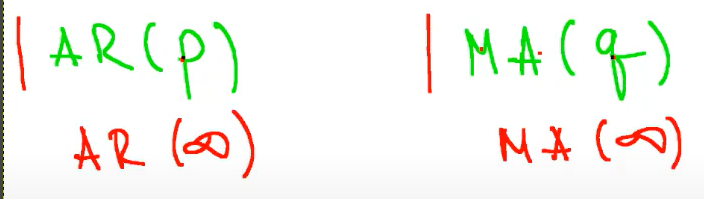


Получается, что мы прогнозируем следующие значения, опираясь на ошибки на предыдущих этапах + возникает новая ошибка.

**Как прогнозировать на ошибках?**

Взглянем иначе, ошибки - это изменения, несоответствие между тем, что должно быть в соответствии с моделью, и тем, что проиошло на практике.

Например, участники рынка не так смотрят на цену акций, как на изменение цены, т.е. основная информация там - как изменилась цена. Они как раз смотрят на эти несоответстия, изменения, **ошибки**.

Т.е. это не модель, которая основана на ошибках, это модель, которая основана на изменениях, каких-то коррекциях этого рынка.

Оказывается, что любой стационарный ряд может быть описан с помощью авторегрессионной модели, абсолютно точно он может быть описан только в пределе,Ю когда число слагаемых/предикторов стремится к бесконечности. Точно так же любой стационарный ряд может быть хорошо приближен с помощью модели скользящего среднего, где число q стремится к бесконечности - чем ближе к бесконечности, тем лучше аппроксимация.

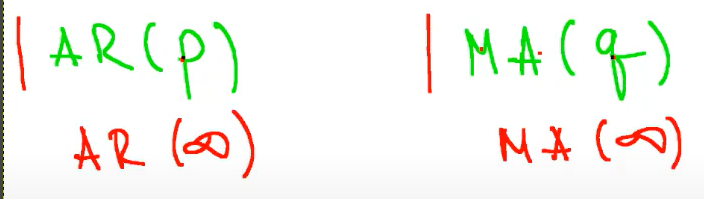

Так жили с двумя моделями, пока бокс и дженкинс не сказали - давайте возьмём модель, в которой будут и слагаемые типа скользящего среднего, и авторегрессионные слагаемые.

а - это параметра авторегресионной части модели

b - параметры части модели - скользящее среднее

+  новая ошибка

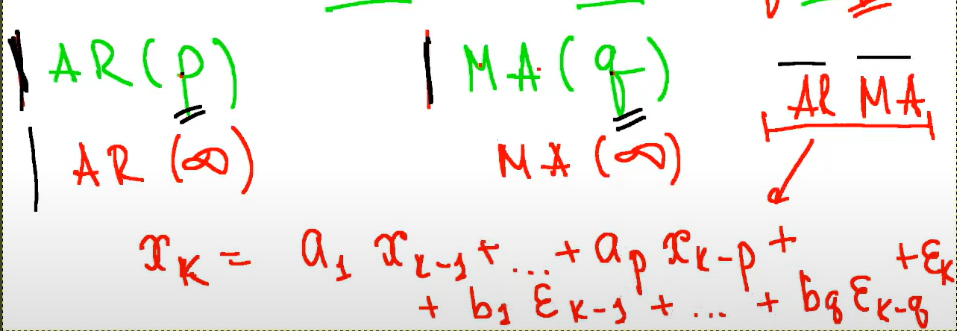



**В чём выигрыш?**

Если мы посомтрим на число слагаемых, то число слагаемых авторегрессионых (p) и скользящего среднего (q), то вместе эти числа оказались маленькими.

даже если взять d - число раз, когда нужно взять разности, макстиуи эта сумма равняется 6:

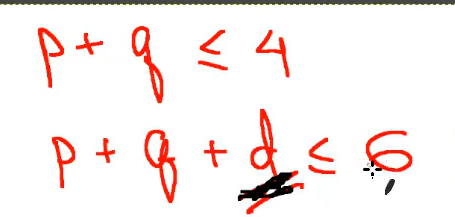


**Проблема**: Как искать p, q, d?

**Решение**: Оказывается, у каждой модели есть свой "отпечаток пальцев". Не смотрим на ряд, не смотрим на моодель - предварительно смотрим на отпечаток и по ним восстанавливаем число авторегрессионныз слагаемых и слагаемых типа скользящего среднего. В качестве этих отпечатков выступают автокорреляционная функция(АКФ) и частная автокорреляционная функция (ЧАКФ).

Есть временной ряд:

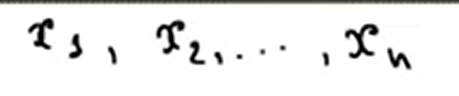

**Базовая идея**: мы смотрим, как много в прошлом информации для предсказания будущего - мы смотрим насколько сильно завтрашние наблюдения зависят от сегодняшних, потом мы будем думать как сильно завтрашнее наблюдения зависят от вчерашних и так далее.

Возьмём тот де ряд, что и раньше(А). Делаем из него новый временной ряд (В) - на единицу сдвинутый в будущее.


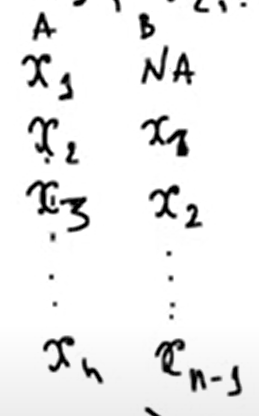

Если считать корреляцию между А и В, на практике это будет означать корреляцию между сегодня и вчера, т.е. корреляция между предыдущим наблюдением и следующим наблюдением. Обозначим эту корреляцию r1. Эта корреляция будет называться автокорреляция - корреляция ряда с самим собой, этот сдвиг между A и B называтся лаг.

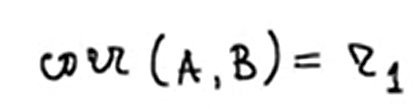




Возьмём столбец B и сдвинем его на единицу в будущее.

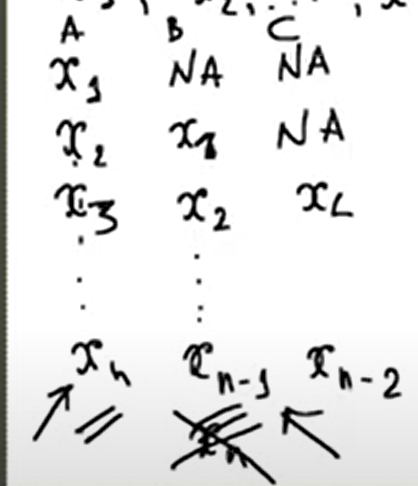

Если считать корреляцию между столбцом А и С (обозначим её r2), она означает как вчера влияет на завтра. Теперь лаг = 2. Можно создать ряды D, E ..., увеличивая лаг.



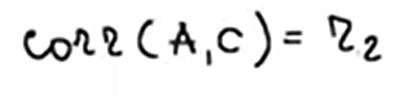

Если k = 10, то получается последовательность чисел, эти 10 чисел называются автокорреляционной функцией.

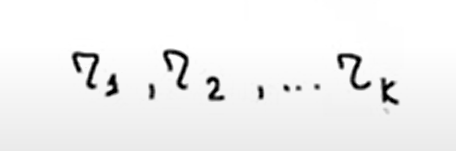


Эту функцию изображают в виде графика:

столбюиковая диаграмма, высота столбика пропорциональна автокорреляции


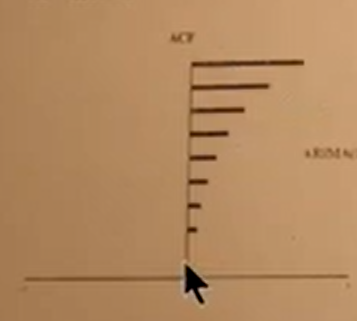

**Частная автокорреляционная функция (PACF)**


Пусть у нас есть три временных ряда:

а - производство электрожнергии в США 1970-1985 гг
b - расходы на потребление в Таиланде 1970-1985 гг
с - рекорд мира по прыжкам с шестом 1970-1985 гг

По словам лектора, если строить зависимость для любой пары, например, предсказывать производство электроэнергии в США по прыжкам с шестом, каждый раз модель была чудесной:

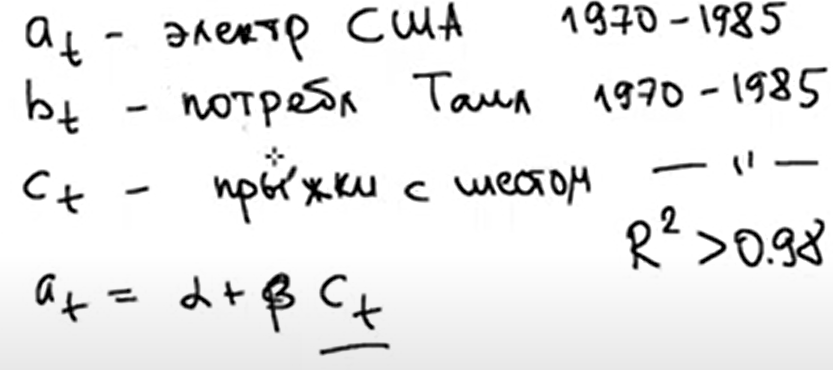


Это т.н. ложная регрессия. Известен такой факт, если есть два ряда и они оба монотонны, у нас всегда получаеется хорошая модель.


производство  электроэнергии - росло

потребление в таиланде - росли

рекорды по прыжкам с шестом - тоже

что если мы изучим зависимость между этими рядами после удаления тренда.


Производство электроэнергии в США после удаления тренда

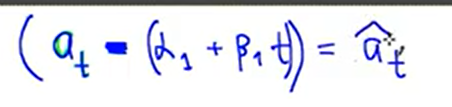

Потребление в Таиланде с удалённым трендом

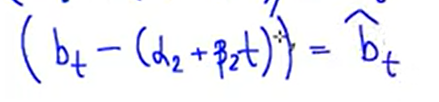

Если начнём искать зависимость очищенного производства электроэнергии (пусть новые обозначения будут гамма и дельта) от очищенного производства в Таиланде.
 Тогда R  в квадрате = 0.03

Можно также искать корреляцию между производством электроэнергии и потреблением в Таиланде, очищенные от влияния времени.

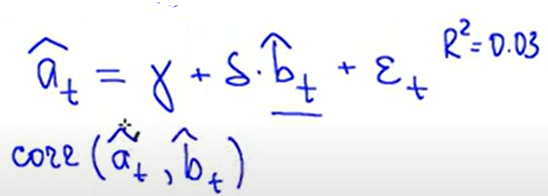

Вернёмся к нашей задачке.
Снова построим ряды A, B (с лагом 1), C (с лагом 2).

Строим регрессионную модель: ряд А, очищенный от влияния Б и ряд С, очищенный от влияния Б.

Считаем корреляцию от А с крышечкой и С с крышечкой, где А с крышечкой - это А очищенное от влияния В, С с крышечкой - это С очищенное от влияния B. Ссысл этой корреляции измерить как влияет С на А: если в автокорреляции С влияло на А опосредовано - было влияние B ( вчера(С) влияет на завтра(А)  через сегодня(B)), то здесь мы смотрим как вчера влияет на завтра, исключив влияние сегодня. И это будет частная корреляция с лагом 2.

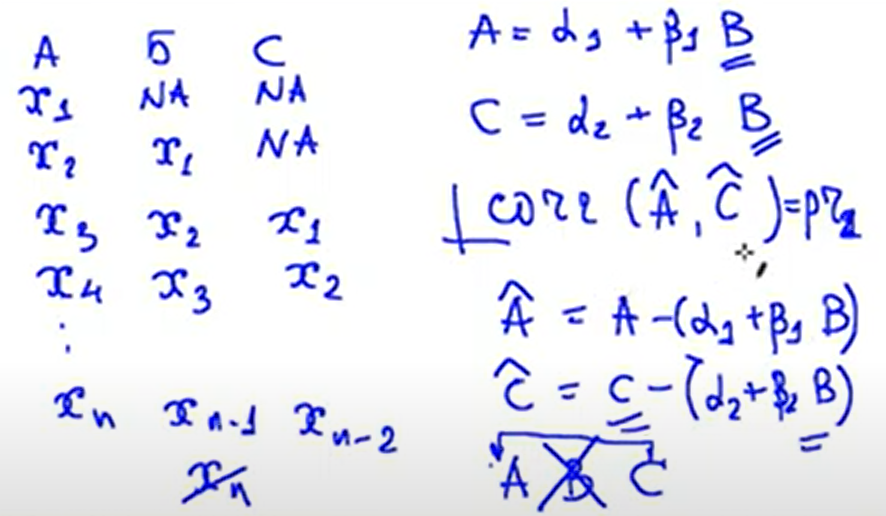

Второе достижение Бокса и Дженкинса состояло в том, что они показали как пара АКФ и ЧАКФ указывает на модель, в данном случае модель 101 - это означает, что одно слагаемое авторегрессионное и одно слагаемое типа скользящего среднего.


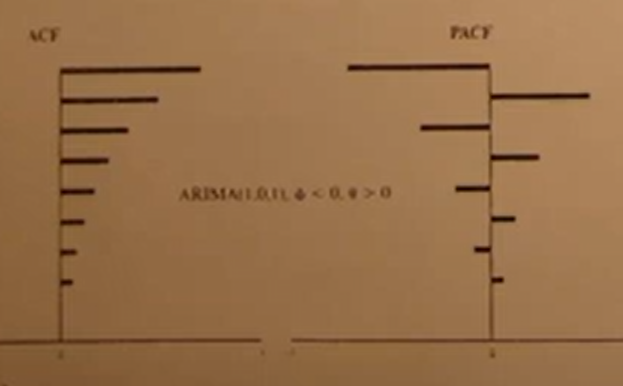

Они создали что-то типа гербария - по листочку с помощью гербария определяем дерево - по паре АКФ - ЧАКФ определяем сколько авторегрессионных слагаемых, скроткр слагаемых типа скользящего среднего нужно включить в модель и после этого процедурой похожей на регрессионную определяем сами значения.